In [1]:
using Plots
using Images

## Day 2 - Morning Session
**Outline**
- atoms and crystal structure
- how electron's behave
- the Schrödinger equation
- the problem...

## atoms and crystal structure

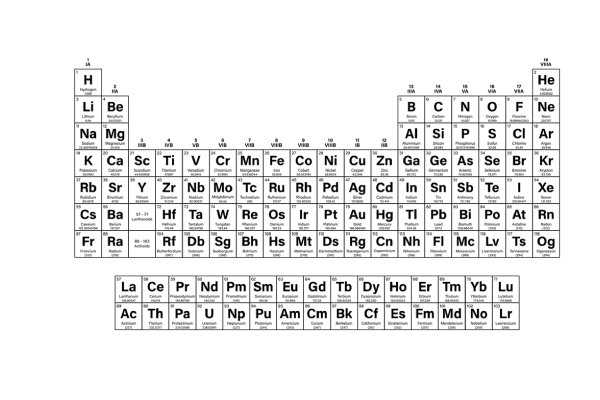

In [2]:
img = load("../../img/periodic_table.png")
plot(img,grid=false, axis=nothing, showaxis=false)

In [3]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;

In [7]:
n=50;
anim = @animate for i ∈ 1:n
    r = 0.05
    p=plot(circle(0,0,0.9), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.7), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.5), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.2), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
    plot!(p, title="Cartoon of atom", showaxis=false);
    annotate!(p, 0, 0, "Z=3");
    x = cos(2π*i/n)
    y = sin(2π*i/n)
    plot!(p, circle(x*0.5,-y*0.5,r), seriestype=[:shape], lw=0, c=:blue, fillalpha=0.75)
    x = cos(π*i/n)
    y = sin(π*i/n)
    plot!(p, circle(-x*0.7,-y*0.7,r), seriestype=[:shape], lw=0, c=:blue, fillalpha=0.75)
    x = cos(0.5*π*i/n)
    y = sin(0.5*π*i/n)
    plot!(p, circle(-x*0.9,y*0.9,r), seriestype=[:shape], lw=0, c=:blue, fillalpha=0.75)
end;

Animation("/var/folders/4r/22403byn7_99b945yg3dkzsm0000gn/T/jl_jtrkrd", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

┌ Info: Saved animation to 
│   fn = /Users/harrisonlabollita/botana_group/outreach/CdeAz2021/day2/slides/atom.gif
└ @ Plots /Users/harrisonlabollita/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/Users/harrisonlabollita/botana_group/outreach/CdeAz2021/day2/slides/atom.gif")
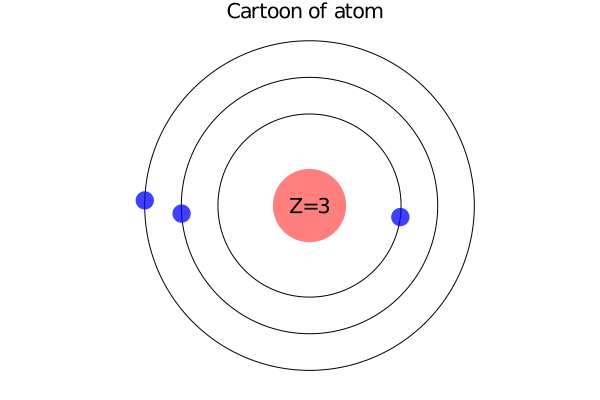

In [8]:
gif(anim, "atom.gif", fps=15)

**Carbon vs. Diamond**

## how electron's behave

## the Schrödinger equation

## the problem...